# Απάντηση Ε2-assignment1

### Ε2: Απόκλιση Καλοκαιρινών Θερμοκρασιών

In [1]:
# Φόρτωση δεδομένων απο NOAA

In [2]:
import numpy as np
import pandas as pd
weather_df=pd.read_csv('noaa_hellinikon_1995_2020.csv')

In [3]:
weather_df.head(10)

,STATION,NAME,DATE,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,NaN
5,GR000016716,"HELLINIKON, GR",1955-01-06,NaN
6,GR000016716,"HELLINIKON, GR",1955-01-07,NaN
7,GR000016716,"HELLINIKON, GR",1955-01-08,NaN
8,GR000016716,"HELLINIKON, GR",1955-01-09,NaN
9,GR000016716,"HELLINIKON, GR",1955-01-10,NaN


In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23251 entries, 0 to 23250
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  23251 non-null  object 
 1   NAME     23251 non-null  object 
 2   DATE     23251 non-null  object 
 3   TAVG     20940 non-null  float64
dtypes: float64(1), object(3)
memory usage: 726.7+ KB


In [5]:
weather_df.dropna(axis=0, how='any', inplace=True) # καθαρισμός απο null values

In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20940 entries, 912 to 23250
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  20940 non-null  object 
 1   NAME     20940 non-null  object 
 2   DATE     20940 non-null  object 
 3   TAVG     20940 non-null  float64
dtypes: float64(1), object(3)
memory usage: 818.0+ KB


In [7]:
# Παίρνουμε την μέση ημερήσια θερμοκρασία για τα έτη 1974-1999, ίσως χρειαστεί

In [8]:
weather_TAVG_1974_1999=weather_df.query('DATE>="1974-01-01" and DATE<="1999-12-31"')[['DATE','TAVG']]
weather_TAVG_1974_1999.isnull().sum()

DATE    0
TAVG    0
dtype: int64

In [9]:
weather_TAVG_1974_1999[weather_TAVG_1974_1999['TAVG']<0] # οι αρνητικές τιμές της "TAVG" για τα έτη 1974-1999

,DATE,TAVG
10275,1983-02-18,-0.9
10276,1983-02-19,-1.1
13181,1991-02-02,-0.1


In [10]:
# Για να βρούμε τις ανωμαλίες για τα έτη 1974-1999 θα πρέπει να υπολογίσουμε τρία (3) πράγματα. Αρχικά θα υπολογ΄ίσουμε τις μέσες τιμ΄ές  του "TAVG" των καλοκαιριών ανά έτος.
# Ύστερα θα υπολογίσουμε για όλα τα έτη την μέση τιμή των καλοκαιριών.
# Τέλος η ανωμαλία θα προκύψει απο την διαφορά των παραπάνω.

In [11]:
# Παίρνουμε την μέση ημερήσια καλοκαιρινή θερμοκρασία για τα έτη 1974-1999 που αντιστοιχούν στους μήνες Ιούνιο-Αύγουστο

In [12]:
temp=weather_df.query('DATE>="1974-01-01" and DATE<="1999-12-31"')[['DATE','TAVG']]
temp['DATE'] = temp['DATE'].apply(pd.to_datetime)  # αυτό το βήμα γίνεται για να κάνουμε την κολώνα ΄'DATE' τύπο datetime
# temp.info()

In [13]:
weather_TAVG_summer_1974_1999=temp[(temp['DATE'].dt.month==6)|(temp['DATE'].dt.month==7)|(temp['DATE'].dt.month==8)] 
# έτη 1974-1999 που αντιστοιχούν στους μήνες Ιούνιο-Αύγουστο
weather_TAVG_summer_1974_1999=weather_TAVG_summer_1974_1999.assign(YEAR=pd.DatetimeIndex(weather_TAVG_summer_1974_1999['DATE']).year)
# πρόσθέτουμε την κολώνα 'YEAR' που θα με βοηθησει για τον υπολογισμό της μέσης τιμής
mean_per_year=weather_TAVG_summer_1974_1999.groupby(['YEAR']).mean()['TAVG'].to_frame('mean_per_year')
mean_per_year

,mean_per_year
YEAR,
1974,26.512791
1975,25.935870
1976,24.820652
1977,26.558696
1978,25.790217
1979,26.150000
1980,25.596739
1981,25.557609
1982,25.027174


In [14]:
# Yπολογίζουμε για όλα τα έτη την μέση τιμή των καλοκαιριών
mean_of_all_years=mean_per_year.mean()
mean_of_all_years

mean_per_year    26.23285
dtype: float64

In [15]:
# Υπολογίζουμε την ανωμαλία ανά έτος
anomaly_table=mean_per_year.assign(anomaly=mean_per_year-mean_of_all_years)['anomaly'].to_frame()
anomaly_table.reset_index(inplace=True)
anomaly_table
# print(len(anomaly_table))

,YEAR,anomaly
0,1974,0.279941
1,1975,-0.296980
2,1976,-1.412198
3,1977,0.325846
4,1978,-0.442632
5,1979,-0.082850
6,1980,-0.636111
7,1981,-0.675241
8,1982,-1.205676
9,1983,-1.883937


In [16]:
anomaly_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     26 non-null     int64  
 1   anomaly  26 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 544.0 bytes


In [17]:
# υπολογιμσός 10 years rolling average με χρήση της pandas
anomaly_table.set_index('YEAR',inplace=True)

In [18]:
rolling_average=anomaly_table.anomaly.rolling(window=10).mean().to_frame()
rolling_average.reset_index(inplace=True)
anomaly_table.reset_index(inplace=True)
rolling_average

,YEAR,anomaly
0,1974,NaN
1,1975,NaN
2,1976,NaN
3,1977,NaN
4,1978,NaN
5,1979,NaN
6,1980,NaN
7,1981,NaN
8,1982,NaN
9,1983,-0.602984


In [19]:
# Το γράφημα

In [20]:
rolling_average.dropna(axis=0, how='any', inplace=True) # καθαρισμός απο null τιμές

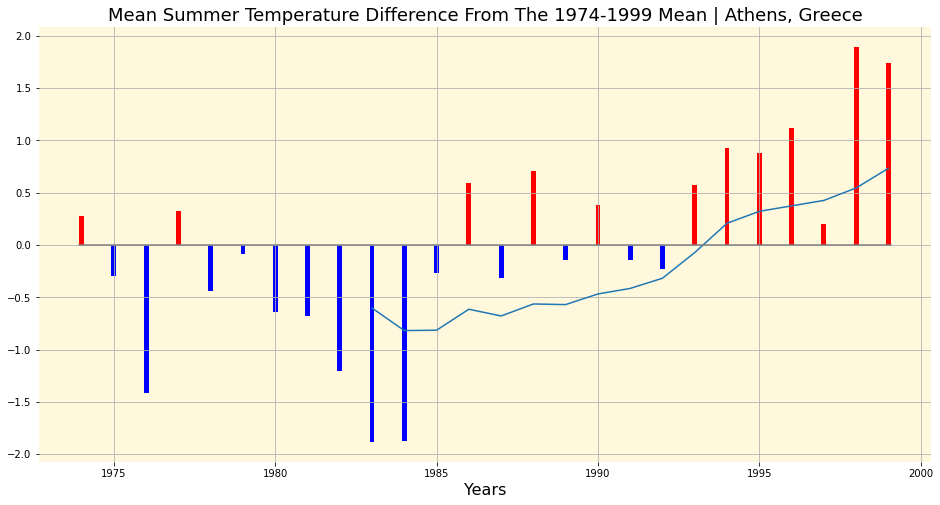

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
colors=[]
width=0.15
for item in anomaly_table['anomaly']:
    if item<0:
        colors.append('b')
    else:
        colors.append('r')
fig=plt.figure(figsize=(16,8))
axes=plt.axes()
plt.bar(x=anomaly_table.YEAR.values,height=anomaly_table.anomaly.values,width=width, color=colors)
sns.lineplot(x=rolling_average.YEAR.values,y=rolling_average.anomaly.values,ci=None)
plt.axhline(y=0, xmin=0.045,xmax=1-0.045, color='grey')
plt.grid('w')
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.set_facecolor('cornsilk')
plt.xlabel('Years', fontsize=16)
plt.title('Mean Summer Temperature Difference From The 1974-1999 Mean | Athens, Greece',fontsize=18)
plt.show()

---
* Ερμηνεία
---

In [22]:
# Στο παραπάνω γράφημα απο τις αρχές του 1974 έως και το ε΄τος 1985 παρατηρούμε τα καλοκαίρια μας να γίνονται όλο και λιγότερο ζεστά, με αποκορύφωμα το καλοκαίρι του 1983. 
# Στην συνέχεια απο το έτος 1986 έως και το ε΄τος 1993 παρατηρόυμε μια ακανόνιστη πορεία στις μεταβολές της θερμοκραίας, με αυξομειώσεις ανά έτος.
# Ενώ προς τα τέλη της χιλιετίας , τα καλοκαίρια μας γίνονται όλο και πιο ζεστά με μεγάλες μεταβολές  , με εξαίρεση το έτος 1997, κάτι το οποίο παρατηρείται με απο 
# τον κινητό μέσο των θερμοκρασιών ανα δεκαετία.